# Boston House prediction

In [159]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [160]:
X=pd.read_csv("Boston_Train.csv")

In [161]:
X

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6


In [162]:
X.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [163]:
X.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
346,346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
350,350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9


In [164]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  351 non-null    int64  
 1   crim        351 non-null    float64
 2   zn          351 non-null    float64
 3   indus       351 non-null    float64
 4   chas        351 non-null    int64  
 5   nox         351 non-null    float64
 6   rm          351 non-null    float64
 7   age         351 non-null    float64
 8   dis         351 non-null    float64
 9   rad         351 non-null    int64  
 10  tax         351 non-null    int64  
 11  ptratio     351 non-null    float64
 12  black       351 non-null    float64
 13  lstat       351 non-null    float64
 14  medv        351 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 41.3 KB


#### From X.info() we get that all the data types are either int or float. This implies that there is no need for an extra  label encoding.

In [165]:
X.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,175.000000,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,101.469207,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,87.500000,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,175.000000,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,262.500000,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,350.000000,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


## Preprocessing and EDA

In [166]:
X.drop("Unnamed: 0",axis=1,inplace=True) 


Dropping column 1("Unnamed :0") as it's unnecessary

In [167]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6


In [168]:
X["chas"].unique()

array([0, 1])

In [169]:
X["rad"].unique()

array([1, 2, 3, 5, 4, 8, 6, 7])

In [170]:
for i in X.columns:
    for j in range(len(X)):
        if X[i][j]== '?':
            X[i][j]=np.nan
          

In [171]:
X.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

So from this we can infer that the data set doesn't have any null values

## Data Visualization

In [172]:
y=X["medv"]

[]

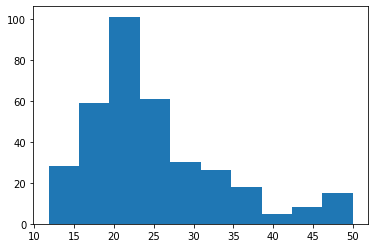

In [173]:
plt.hist(y)
plt.plot()

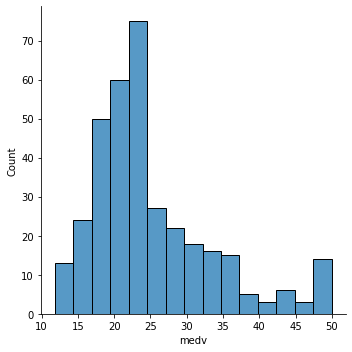

In [174]:
sns.displot(y);

In [175]:
X.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.298187,0.557235,0.129417,0.773321,-0.232369,0.487005,-0.490656,0.140519,0.406203,-0.222599,-0.522173,0.406877,-0.194024
zn,-0.298187,1.000000,-0.461280,-0.060150,-0.453540,0.327331,-0.516954,0.592013,-0.187620,-0.109459,-0.323917,0.141986,-0.384008,0.334885
indus,0.557235,-0.461280,1.000000,0.127674,0.669111,-0.384208,0.525184,-0.594800,0.018118,0.437328,0.101026,-0.311502,0.512586,-0.365981
chas,0.129417,-0.060150,0.127674,1.000000,0.131093,0.037826,0.129274,-0.153217,0.087686,-0.029835,-0.133981,-0.054426,0.062915,0.085798
nox,0.773321,-0.453540,0.669111,0.131093,1.000000,-0.262861,0.667044,-0.719072,0.138287,0.394700,-0.188388,-0.427552,0.488516,-0.247384
rm,-0.232369,0.327331,-0.384208,0.037826,-0.262861,1.000000,-0.179751,0.095919,0.094140,-0.204730,-0.328928,0.166340,-0.680006,0.894837
age,0.487005,-0.516954,0.525184,0.129274,0.667044,-0.179751,1.000000,-0.681234,0.126482,0.266733,0.049163,-0.229513,0.552882,-0.256284
dis,-0.490656,0.592013,-0.594800,-0.153217,-0.719072,0.095919,-0.681234,1.000000,-0.104500,-0.229837,0.023590,0.235331,-0.343134,0.047454
rad,0.140519,-0.187620,0.018118,0.087686,0.138287,0.094140,0.126482,-0.104500,1.000000,0.229822,-0.023634,-0.060212,-0.026626,0.066628
tax,0.406203,-0.109459,0.437328,-0.029835,0.394700,-0.204730,0.266733,-0.229837,0.229822,1.000000,-0.011439,-0.270342,0.240023,-0.286039


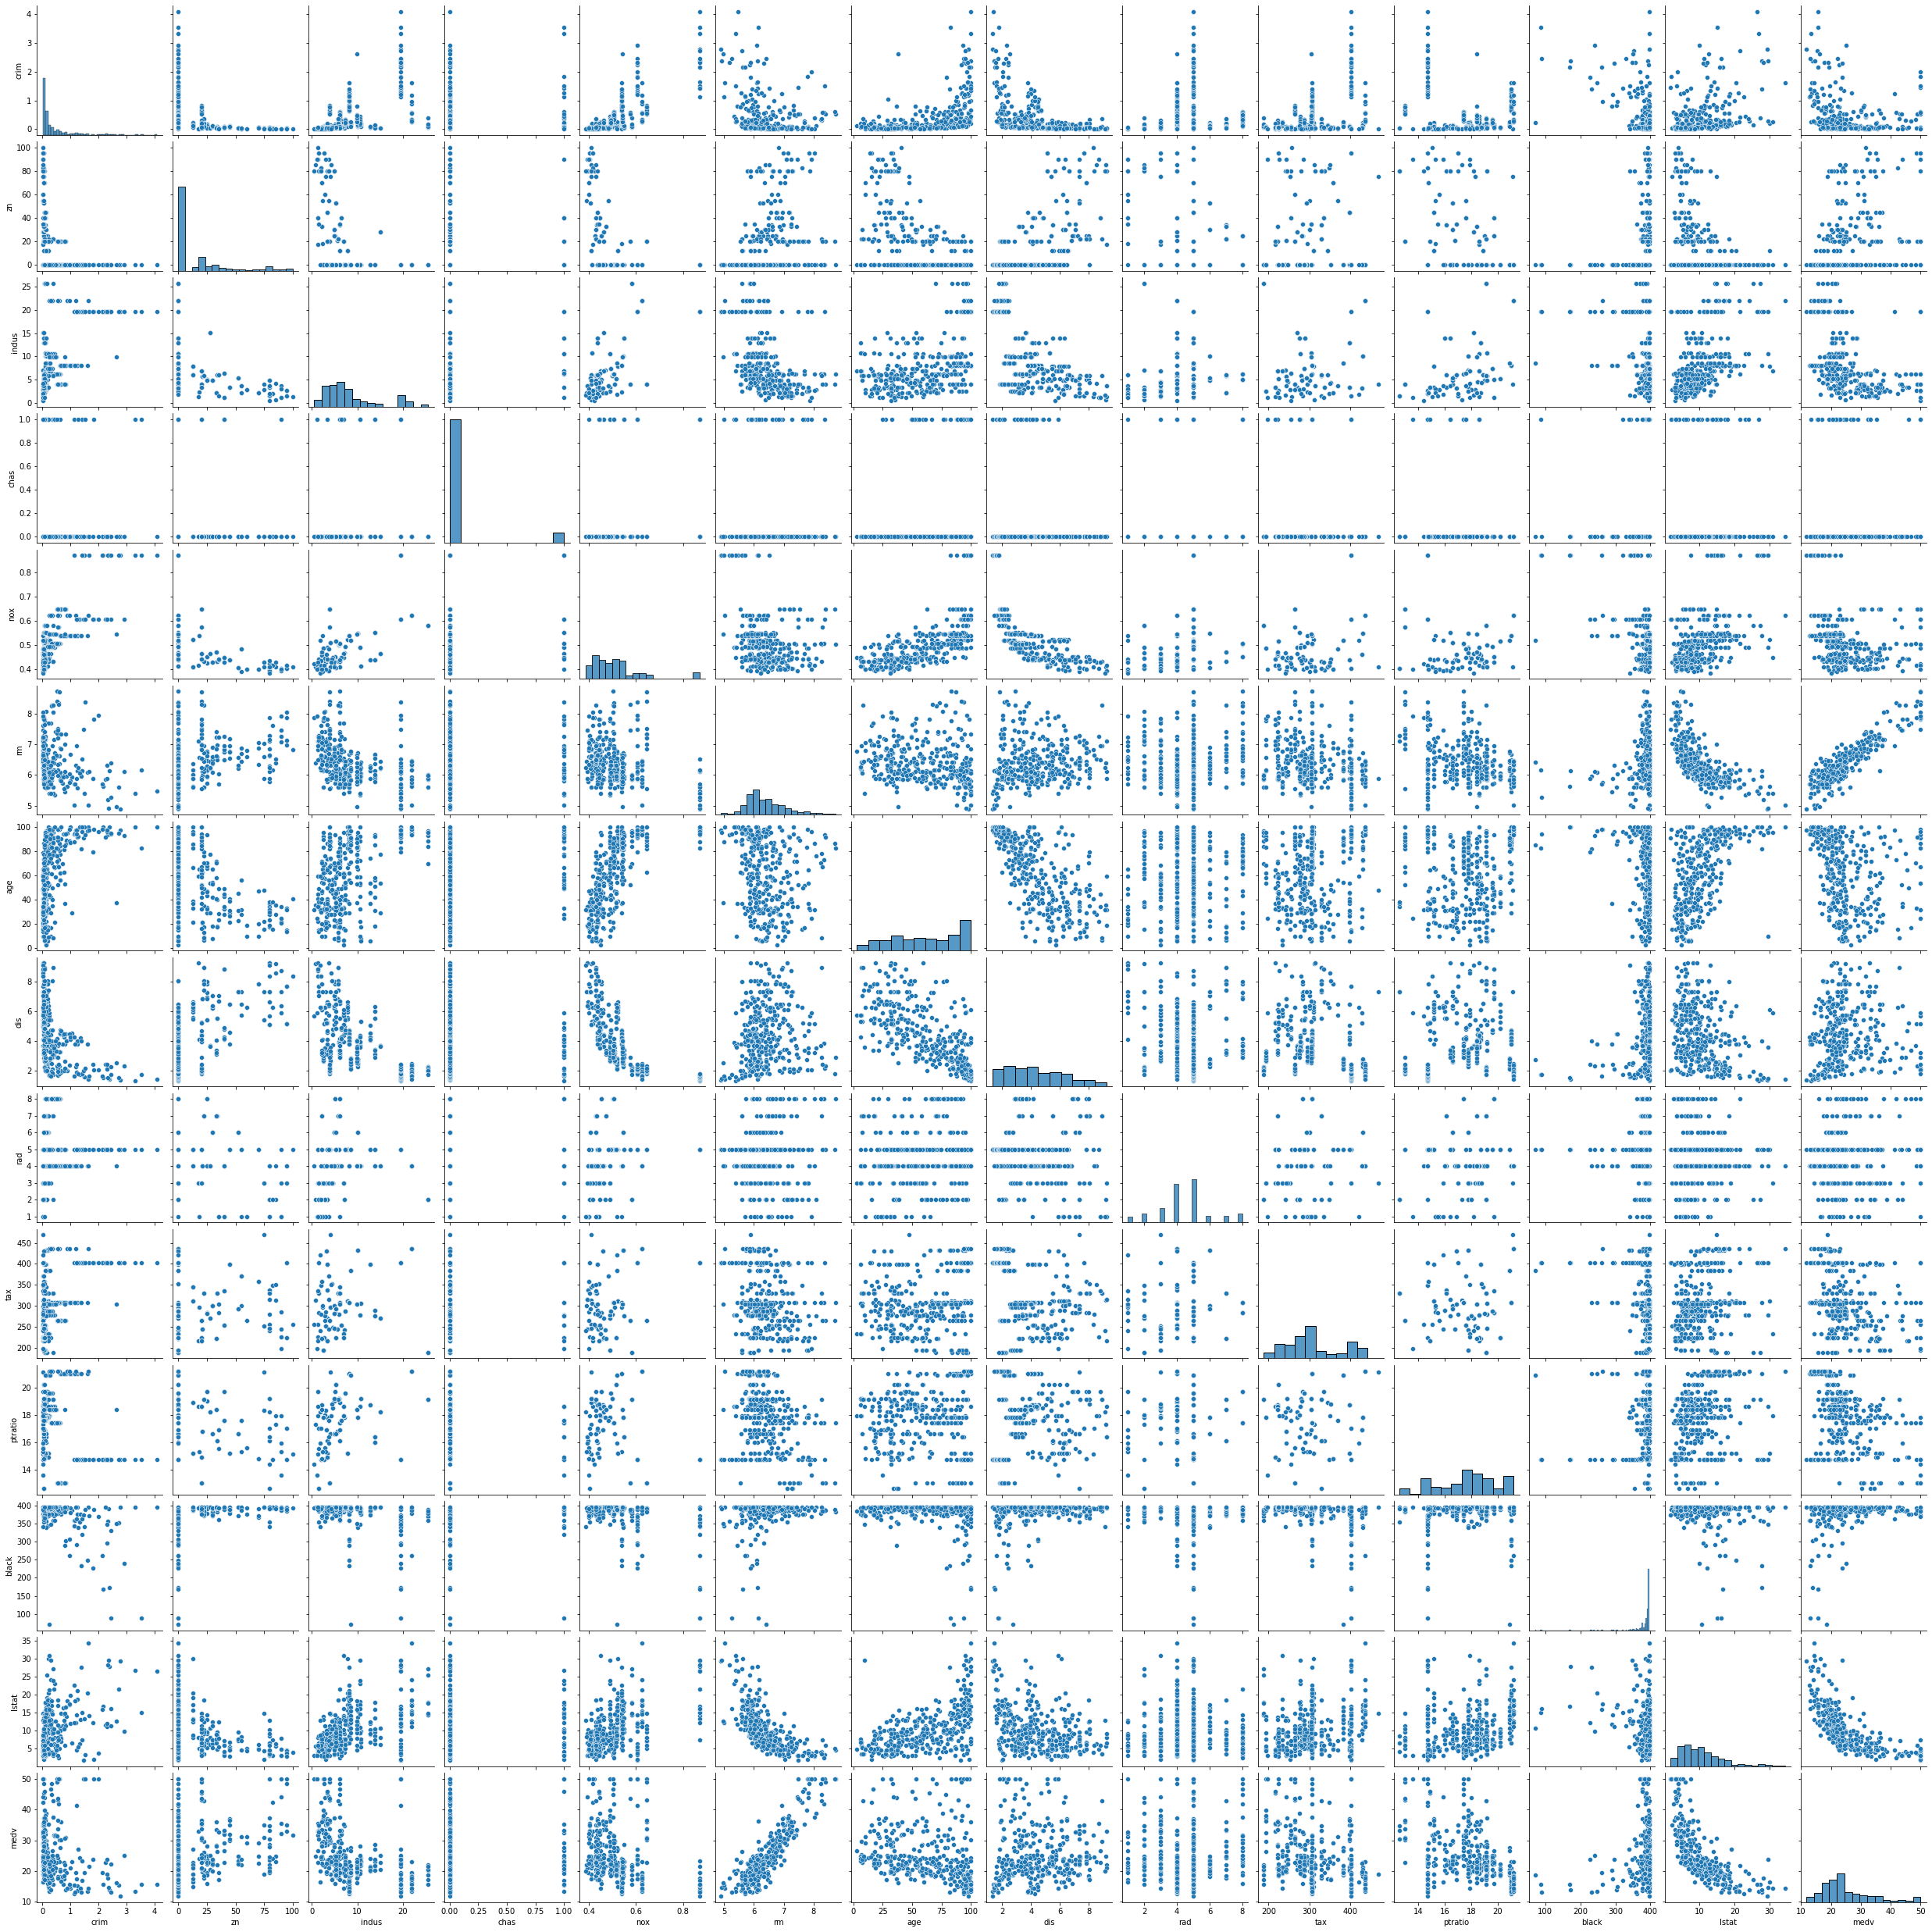

In [176]:
sns.pairplot(X)

<AxesSubplot:>

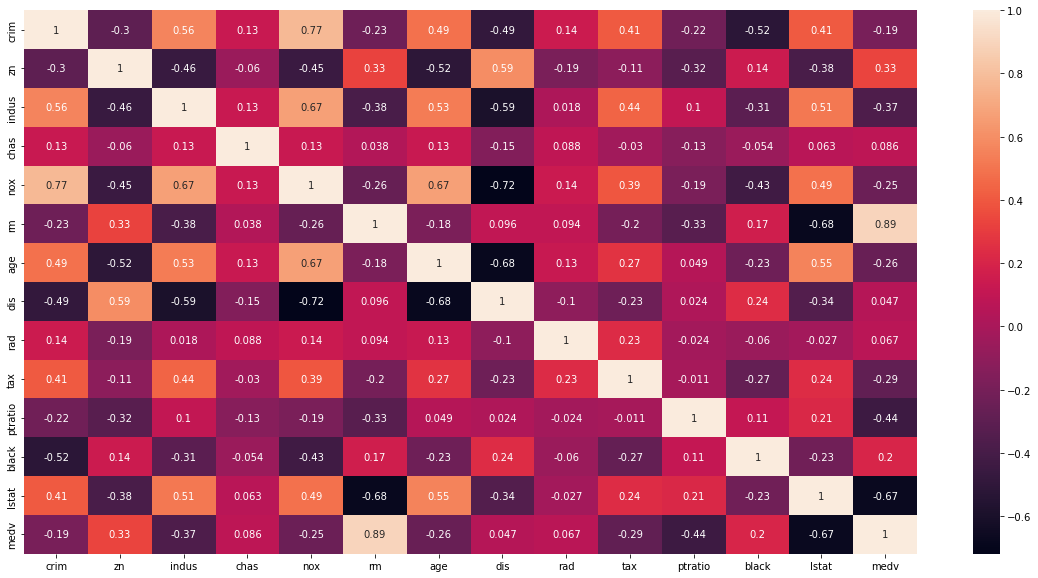

In [177]:
plt.subplots(figsize = (20,10))
sns.heatmap(X.corr(),annot=True)

<AxesSubplot:xlabel='rm', ylabel='medv'>

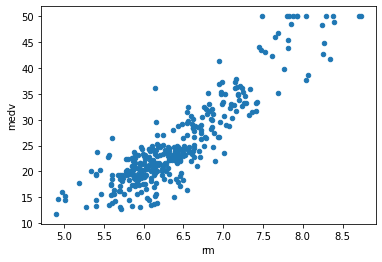

In [178]:
X.plot.scatter('rm','medv')

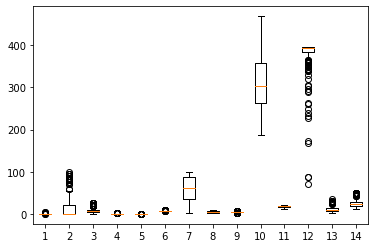

In [179]:
plt.boxplot(X)
plt.show()

* We can observe from these plots that "rm" column and "medv"- output column have highest positive correlation

### Let's focus on more on other correlations

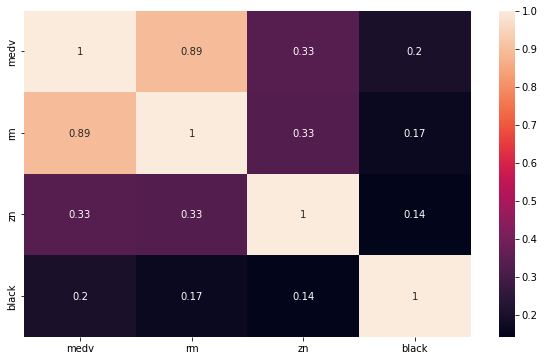

In [180]:
#Positive correlations
col1 = X.corr().nlargest(4, 'medv')['medv'].index
corr_mat = X[col1].corr()
plt.subplots(figsize = (10,6))
sns.heatmap(corr_mat,annot=True)
plt.show()

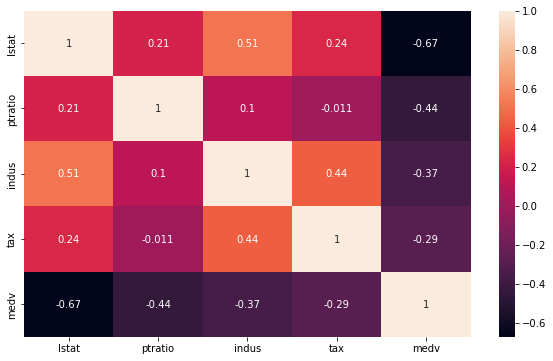

In [181]:
#Negative correelations
col2 = X.corr().nsmallest(4, 'medv')['medv'].index
corrmat2 = pd.concat([X[col2], X['medv']], axis=1).corr()
plt.subplots(figsize = (10,6))
sns.heatmap(corrmat2, annot=True)
plt.show()

* From these correlations plot we obtain that "rm","Istat","ptratio","indus" have good correaltions with the target feature

### Dropping output column

In [182]:
X.drop("medv",axis=1,inplace=True)

### Creating a copy of trainnig set before applying standardization

In [183]:
X_train_copy=X
y_train_copy=y


## Standardization

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X=StandardScaler().fit_transform(X)
X

array([[-0.61694501,  0.10451769, -1.00746714, ..., -1.09683938,
         0.40622633, -0.92303849],
       [-0.58418913, -0.59947247, -0.22460682, ...,  0.04205135,
         0.40622633, -0.21558495],
       [-0.58422035, -0.59947247, -0.22460682, ...,  0.04205135,
         0.30547935, -1.08459639],
       ...,
       [-0.60338386,  2.52937267, -1.05680708, ..., -0.32239368,
         0.25869513, -0.75127693],
       [-0.58156742,  0.9649501 , -1.18180159, ...,  0.9076083 ,
         0.23171375, -0.76828303],
       [-0.5298821 ,  0.9649501 , -1.18180159, ...,  0.9076083 ,
         0.40622633, -0.75297754]])

## Test data


In [185]:
X_train=X
y_train=y
X_test=pd.read_csv("Boston_Test.csv")
y_test=X_test["medv"]
X_test.drop("Unnamed: 0",axis=1,inplace=True)
X_test.drop("medv",axis=1,inplace=True)
X_train

array([[-0.61694501,  0.10451769, -1.00746714, ..., -1.09683938,
         0.40622633, -0.92303849],
       [-0.58418913, -0.59947247, -0.22460682, ...,  0.04205135,
         0.40622633, -0.21558495],
       [-0.58422035, -0.59947247, -0.22460682, ...,  0.04205135,
         0.30547935, -1.08459639],
       ...,
       [-0.60338386,  2.52937267, -1.05680708, ..., -0.32239368,
         0.25869513, -0.75127693],
       [-0.58156742,  0.9649501 , -1.18180159, ...,  0.9076083 ,
         0.23171375, -0.76828303],
       [-0.5298821 ,  0.9649501 , -1.18180159, ...,  0.9076083 ,
         0.40622633, -0.75297754]])

Creating a copy of X_test and y_test set before standardization

In [186]:
X_test_copy=X_test
y_test_copy=y_test

In [187]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     155 non-null    float64
 1   zn       155 non-null    int64  
 2   indus    155 non-null    float64
 3   chas     155 non-null    int64  
 4   nox      155 non-null    float64
 5   rm       155 non-null    float64
 6   age      155 non-null    float64
 7   dis      155 non-null    float64
 8   rad      155 non-null    int64  
 9   tax      155 non-null    int64  
 10  ptratio  155 non-null    float64
 11  black    155 non-null    float64
 12  lstat    155 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 15.9 KB


In [188]:
X_test.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

In [189]:
X_test.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,10.886843,2.387097,17.253484,0.051613,0.654239,6.014555,86.140645,2.377864,21.045161,629.916129,20.149032,302.744258,17.737742
std,12.842318,13.294070,3.973223,0.221961,0.076748,0.687848,17.844278,1.678612,7.137192,107.071159,0.475281,139.254349,7.134484
min,0.017090,0.000000,1.690000,0.000000,0.410000,3.561000,18.500000,1.129600,1.000000,187.000000,17.000000,0.320000,2.960000
25%,4.385535,0.000000,18.100000,0.000000,0.591000,5.695000,81.900000,1.643250,24.000000,666.000000,20.200000,288.690000,13.335000
50%,7.839320,0.000000,18.100000,0.000000,0.679000,6.112000,92.600000,2.004800,24.000000,666.000000,20.200000,378.380000,17.270000
75%,13.441000,0.000000,18.100000,0.000000,0.713000,6.414000,98.250000,2.501600,24.000000,666.000000,20.200000,396.555000,21.945000
max,88.976200,90.000000,27.740000,1.000000,0.770000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [190]:
scaler1 = StandardScaler().fit(X_test)
X_test=StandardScaler().fit_transform(X_test)
X_test

array([[-0.84426932,  4.34777724, -3.92979058, ..., -3.90300973,
         0.49015546, -1.72226103],
       [-0.84482084,  4.34777724, -3.92979058, ..., -3.90300973,
         0.64540989, -1.39883812],
       [-0.84914478,  6.61173739, -3.84646534, ..., -6.64710065,
         0.58871141, -1.86147351],
       ...,
       [-0.84573328, -0.18014307, -1.34418341, ...,  1.79625605,
         0.67833392, -1.70116824],
       [-0.84191869, -0.18014307, -1.34418341, ...,  1.79625605,
         0.6534788 , -1.58304856],
       [-0.84677619, -0.18014307, -1.34418341, ...,  1.79625605,
         0.67833392, -1.38618244]])

In [191]:

y_train

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
346    17.2
347    23.1
348    24.5
349    26.6
350    22.9
Name: medv, Length: 351, dtype: float64

## Applying different models

### Evaluation metrics

In [192]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

## 1) Linear Regression

#### * We are using "rm"(average number of rooms per dwelling) feature for creating this model because it has the highest correlation value with output feature "medv"

In [193]:
X_train1=X_train_copy["rm"]
X_test1=X_test_copy["rm"]
X_test1=np.array(X_test1).reshape(-1,1)
X_train1=np.array(X_train1).reshape(-1,1)
scaler = StandardScaler().fit(X_train1)
X_train1=StandardScaler().fit_transform(X_train1)
scaler = StandardScaler().fit(X_test1)
X_test1=StandardScaler().fit_transform(X_test1)

In [194]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train1, y_train)
y_pred = reg.predict(X_test1)


* Evaluation of linear regression

In [195]:
MSE_score = mean_squared_error(y_test, y_pred, squared = True)
print("Mean_squared_error= ",MSE_score)
RMSE_score = mean_squared_error(y_test, y_pred, squared = False) #Root mean squared error
print("Root_mean_squared_error= ",RMSE_score)


Mean_squared_error=  173.35699725038413
Root_mean_squared_error=  13.166510443180613


In [196]:
r2_score(y_test,y_pred)

-1.6034174988186067

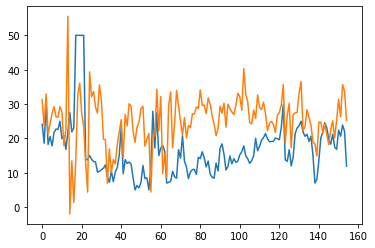

In [197]:
plt.plot(y_test, label='training')
plt.plot(y_pred, label='prediction')
plt.show()

## 2) Multiple Linear Regression

#### * Here we use the entire training feature set

In [198]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)


* Evaluation of linear regression

In [199]:
MSE_score = mean_squared_error(y_test, y_pred, squared = True)
print("Mean_squared_error= ",MSE_score)
RMSE_score = mean_squared_error(y_test, y_pred, squared = False) #Root mean squared error
print("Root_mean_squared_error= ",RMSE_score)


Mean_squared_error=  150.17914623231255
Root_mean_squared_error=  12.25476014584996


In [200]:
r2_score(y_test,y_pred)

-1.2553402715792283

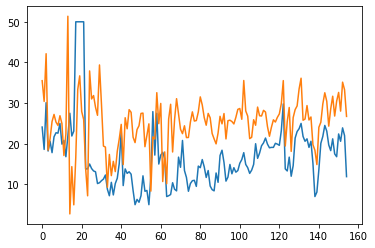

In [201]:
plt.plot(y_test, label='training')
plt.plot(y_pred, label='prediction')
plt.show()

## Multiple Linear Regression without standardization

#### From this model we figure out that Mean squared error is high if the data isn't standardized

Mean squared error =  547.5466502115846


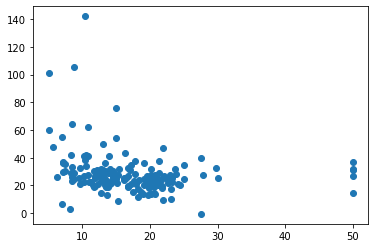

In [202]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_copy, y_train_copy)
y_pred = reg.predict(X_test_copy)
plt.scatter(y_test_copy,y_pred)
print("Mean squared error = ",mean_squared_error(y_test_copy, y_pred, squared = True))

In [203]:
reg.score(X_test_copy,y_test_copy)


-7.222872760777424

## 3) Polynomial Regression (Best model)

#### * Here we are using "rm","indus","ptratio","lstat"  features among all other features

In [222]:
df1=pd.read_csv("Boston_train.csv")
df2=pd.read_csv("Boston_test.csv")
df1.drop("Unnamed: 0",axis=1,inplace=True)
df2.drop("Unnamed: 0",axis=1,inplace=True)
y_train=df1["medv"]
y_test=df2["medv"]
df1.drop("medv",axis=1,inplace=True)
df2.drop("medv",axis=1,inplace=True)

In [223]:
scaler = StandardScaler().fit(df1)
df1=pd.DataFrame(scaler.transform(df1))
df1.columns=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]

In [224]:
scaler = StandardScaler().fit(df2)
df2=pd.DataFrame(scaler.transform(df2))
df2.columns=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]

In [225]:
X=pd.concat([df1, df2])
y=pd.concat([y_train,y_test])

#### Here we are concatinating both dataframes and then applying train_test split inorder to get a better r2_score 

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [227]:
from sklearn.preprocessing import PolynomialFeatures
rmse=[]
r2score=[]
for i in range(1,11):
    poly = PolynomialFeatures(i)
    X_train2=X_train[["rm","ptratio","indus","lstat"]]
    X_test2=X_test[["rm","ptratio","indus","lstat"]]
    poly.fit(X_train2)
    X_train2 = poly.transform(X_train2)
    X_test2 = poly.transform(X_test2)
    reg = LinearRegression()
    model = reg.fit(X_train2, y_train)
    y_pred = model.predict(X_test2)
    a=np.sqrt(mean_squared_error(y_test, y_pred))
    rmse.append(a)
    b=r2_score(y_test,y_pred)
    r2score.append(b)

In [228]:
rmse

[6.817209644692491,
 5.894047495370686,
 5.7330698637988435,
 40.41741225962138,
 60.02346963059224,
 1435.7050534724438,
 3487341.3690080694,
 3282898.667322097,
 43910233.98329996,
 443942239.7760052]

In [229]:
r2score

[0.4983387171560075,
 0.6250058029140897,
 0.6452096872879588,
 -16.6333282978456,
 -37.89013734724653,
 -22248.88358259167,
 -131276263901.8255,
 -116335494491.55157,
 -20812717411247.234,
 -2127405229756098.0]

In [230]:
d=rmse.index(min(rmse))
print("The best model is the model with a degree = ",d+1)
print("The Root mean squared error value = ",min(rmse))


The best model is the model with a degree =  3
The Root mean squared error value =  5.7330698637988435


### Note : The best model among Linear regression, Multiple linear regression, Polynomial regression is Polynomial regression with degree 2 using the features "rm","lstat","ptratio",indus".


### Visualization and Evaluation of best model

In [231]:
poly = PolynomialFeatures(3)
X_train2=X_train[["rm","ptratio","indus","lstat"]]
X_test2=X_test[["rm","ptratio","indus","lstat"]]
poly.fit(X_train2)
X_train2 = poly.transform(X_train2)
X_test2 = poly.transform(X_test2)
reg = LinearRegression()
model = reg.fit(X_train2, y_train)
y_pred = model.predict(X_test2)


* Plot rm vs House prices(y_test,y_pred)

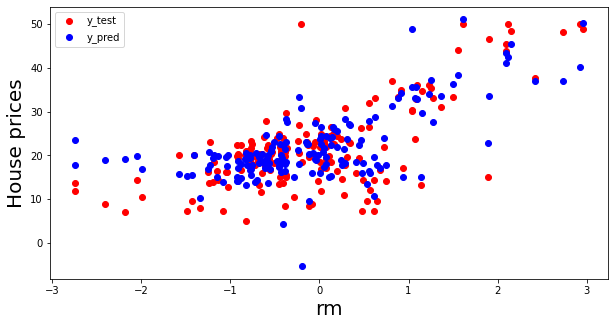

In [241]:
plt.figure(figsize=(10,5))
plt.scatter(X_test.iloc[:,5:6],y_test,c='r',label='y_test')
plt.scatter(X_test.iloc[:,5:6],y_pred,c='b',label='y_pred')
plt.xlabel("rm",size=20)
plt.ylabel("House prices",size=20)
plt.legend()
plt.show()


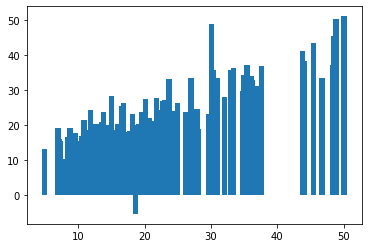

In [237]:
barlist = plt.bar(y_test, y_pred)
plt.show()

In [234]:
r2_score(y_test, y_pred)

0.6452096872879588

In [235]:
mean_absolute_error(y_test, y_pred)

4.32351244503614

In [218]:
median_absolute_error(y_test, y_pred)

2.749313695140305

## Random Forest Regression (Extra)

In [219]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor().fit(X_train, y_train.ravel())
y_pred = forest.predict(X_test)

MSE_score1 = mean_squared_error(y_test, y_pred, squared = True)
print("Mean_squared_error= ",MSE_score1)
RMSE_score1 = mean_squared_error(y_test, y_pred, squared = False) #Root mean squared error
print("Root_mean_squared_error= ",RMSE_score1)



Mean_squared_error=  16.805548940119767
Root_mean_squared_error=  4.099457151882401


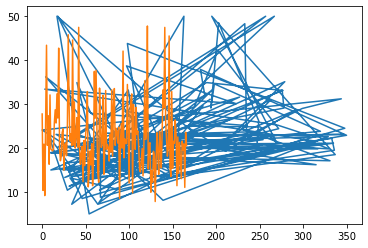

In [220]:
plt.plot(y_test, label='training')
plt.plot(y_pred, label='prediction')
plt.show()

In [221]:
r2_score(y_test,y_pred)

0.8016282398360143